# New **QAOA** 

---
After all development and research, a new path to follow is to study the QAOA algorithm in more depth to try to solve the NMcut problem. The main idea is to try variations of the QAOA to see if this method is feasible and use this to solve the NMcut in a real QPU.

In [1]:
from qiskit.quantum_info import SparsePauliOp,Statevector
from typing import Union
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_histogram
from scipy.optimize import minimize
import re
import sys

sys.path.append('../')

from qaoa_functions import *
from qa_functions import treecmp

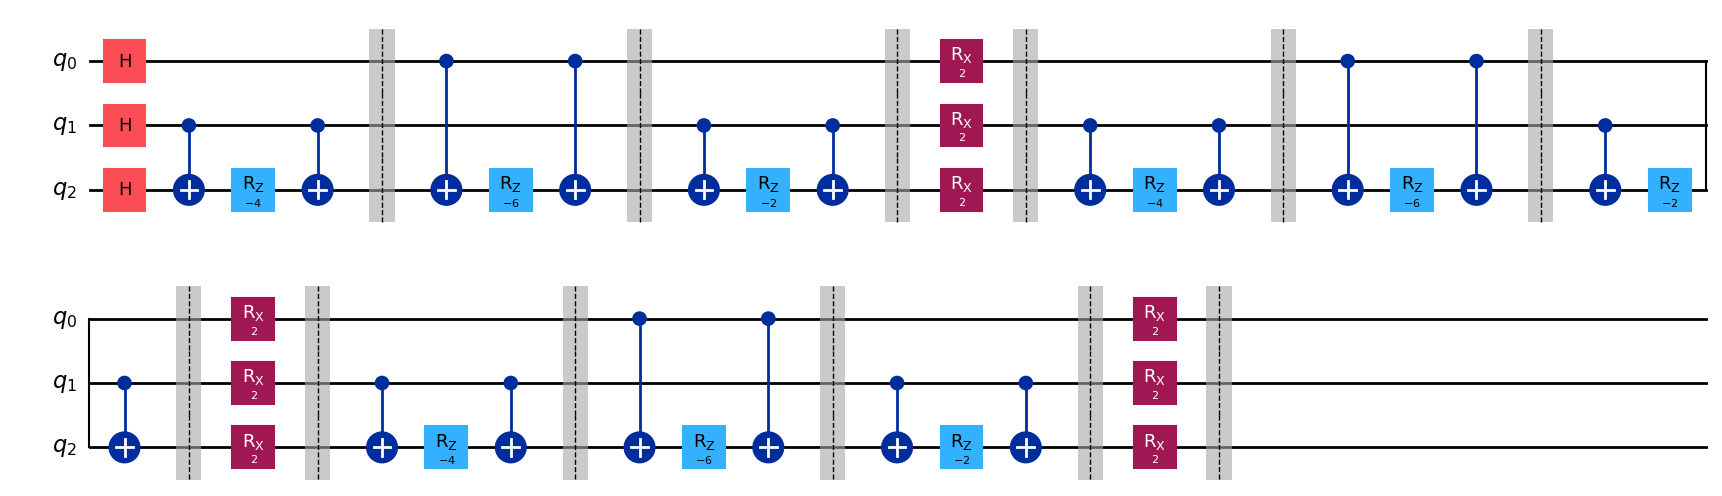

In [3]:
qc = create_ansatz("2Z1Z2+3Z0Z2+Z1Z2",3,layers=3,phi=[1]*3,beta=[1]*3)

qc.draw('mpl')

In [3]:
exp = "2Z1Z2+3Z0Z2+Z1Z2"
qaoa = QAOA(exp,3,2)
qaoa.get_opt_circ()

print("El minimo de energia es:",qaoa.min)
print("Los parametros son:",qaoa.param)
qaoa.qc.draw('mpl')

TypeError: QAOA.__init__() takes 3 positional arguments but 4 were given

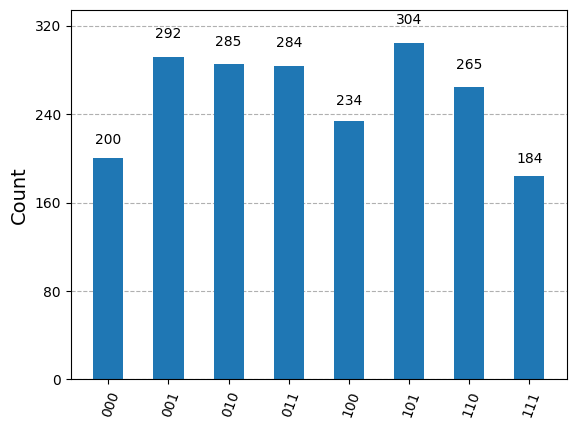

In [4]:
sim = AerSimulator()

# Transpile the circuit for the simulator or real QPU
qc.measure_all()
qc = transpile(qc,sim)

# Run the circuit and collect results
sampler = SamplerV2()
job = sampler.run([qc],shots=2048)
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
plot_histogram(counts)

In [3]:
import dimod
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
exp_qubo = min_cut_c(matrix,c=1,alpha=matrix.shape[0]*1000)
print(exp)
print(exp_qubo)

+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+7500.0Z1+7500.0Z0+7500.0Z2+7500.0Z3+7500.0Z4
BinaryQuadraticModel({1: -4804.0, 0: -4665.0, 2: -4808.0, 3: -4809.0, 4: -4782.0}, {(0, 1): 9816.0, (2, 1): 9958.0, (2, 0): 9854.0, (3, 1): 9902.0, (3, 0): 9844.0, (3, 2): 9930.0, (4, 1): 9932.0, (4, 0): 9816.0, (4, 2): 9874.0, (4, 3): 9942.0}, 5000.0, 'BINARY')


In [15]:
solver = dimod.ExactCQMSolver()
problem = dimod.ConstrainedQuadraticModel()
problem.set_objective(exp_qubo)
sol = solver.sample_cqm(problem)

# We want the best feasible solution. We can filter by its feasibility and take the first element
feas_sol = sol.filter(lambda s: s.is_feasible)
print(feas_sol)

   0 1 2 3 4  energy num_oc. is_sat. is_fea.
8  0 0 0 1 0   191.0       1 arra... np.T...
4  0 0 1 0 0   192.0       1 arra... np.T...
2  0 1 0 0 0   196.0       1 arra... np.T...
16 0 0 0 0 1   218.0       1 arra... np.T...
1  1 0 0 0 0   335.0       1 arra... np.T...
0  0 0 0 0 0  5000.0       1 arra... np.T...
20 0 0 1 0 1  5284.0       1 arra... np.T...
10 0 1 0 1 0  5289.0       1 arra... np.T...
12 0 0 1 1 0  5313.0       1 arra... np.T...
6  0 1 1 0 0  5346.0       1 arra... np.T...
18 0 1 0 0 1  5346.0       1 arra... np.T...
3  1 1 0 0 0  5347.0       1 arra... np.T...
24 0 0 0 1 1  5351.0       1 arra... np.T...
17 1 0 0 0 1  5369.0       1 arra... np.T...
9  1 0 0 1 0  5370.0       1 arra... np.T...
5  1 0 1 0 0  5381.0       1 arra... np.T...
11 1 1 0 1 0 20284.0       1 arra... np.T...
21 1 0 1 0 1 20289.0       1 arra... np.T...
19 1 1 0 0 1 20313.0       1 arra... np.T...
13 1 0 1 1 0 20346.0       1 arra... np.T...
25 1 0 0 1 1 20346.0       1 arra... np.T...
28 0 0 1 1

In [36]:
qaoa = QAOA(exp,5,2,method='Powell')
qaoa.get_opt_circ()

print("El minimo de energia es:",qaoa.min)
print("Los parametros son:",qaoa.param)
# qaoa.qc.draw('mpl')

El minimo de energia es: -2205.2646484375
Los parametros son: [5.78000894 1.47628589 0.87071312 2.86043006]


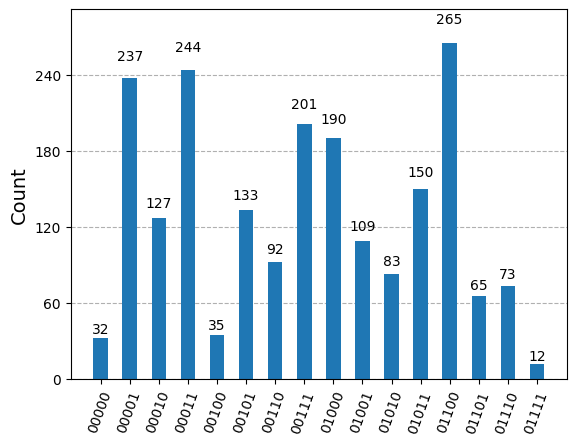

In [37]:
sim = AerSimulator()
qc = qaoa.qc
# Transpile the circuit for the simulator or real QPU
qc.measure_all()
qc = transpile(qc,sim)

# Run the circuit and collect results
sampler = SamplerV2()
job = sampler.run([qc],shots=2048)
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
counts = combine_inverse_keys(counts)
plot_histogram(counts)

## TODO for tomorrow

- Test for all the optimization methods, do 10 attempts for each method, and order them. Also, probably $x_0$ should be the same for all of them.
- Test other methods, beginning with the multiangle-QAOA
- `get_energy` might be wrong, check the function using an exact calculation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
# Removed Newton-CG, dogleg, trust-ncg, trust-krylov, trust-exact because they need a gradient
opt = ['CG','BFGS','Nelder-Mead','L-BFGS-B','Powell','TNC','COBYLA','COBYQA','SLSQP','trust-constr']
sim = AerSimulator()
param = {}
filename = 'qaoa_random_start_2.txt'
with open(filename,'w') as f:
    with open(filename.replace('.txt','.csv'),'w') as f2:
        f2.write('Method,Layers,Energy,Solution,Parameters\n')
        for lay in range(1,4):
            f.write(f'--------------------  {lay} LAYERS  --------------------\n')
            print(f'--------------------  {lay} LAYERS  --------------------')
            # x0 = [np.pi]*lay + [np.pi/2]*lay
            for option in opt:
                qaoa = QAOA(exp,5,method=option,layers=lay)
                min = np.inf
                best = ''
                for _ in range(10):
                    qaoa.get_min()
                    # qc = qaoa.qc
                    # # Transpile the circuit for the simulator or real QPU
                    # qc.measure_all()
                    # qc = transpile(qc,sim)

                    # # Run the circuit and collect results
                    # sampler = SamplerV2()
                    # job = sampler.run([qc],shots=2048)
                    # job_result = job.result()
                    # counts=job_result[0].data.meas.get_counts()
                    # counts = combine_inverse_keys(counts)
                    # best_i = max(counts,key=counts.get)
                    if qaoa.min<min:
                        min=qaoa.min
                        counts = combine_inverse_keys(qaoa.counts)
                        best = max(counts,key=counts.get)
                        param[f'{option}_{lay}'] = qaoa.param
                print(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}')
                f.write(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}\n')
                f2.write(f'{option},{lay},{min},{best},{qaoa.param.tolist()}\n')
        print('--------------------  END  --------------------')
        f.write('--------------------  END  --------------------\n')
        
        f.write('--------------------  PARAMETERS  --------------------\n')
        print('--------------------  PARAMETERS  --------------------')
        for key in param:
            f.write(f'{key}: {param[key]}\n')
            print(f'{key}: {param[key]}')

--------------------  1 LAYERS  --------------------
Minimum energy for the method CG with 1 layers: -913.0673828125. Best solution: 01101
Minimum energy for the method BFGS with 1 layers: -1083.6220703125. Best solution: 01101
Minimum energy for the method Nelder-Mead with 1 layers: -1972.060546875. Best solution: 01011
Minimum energy for the method L-BFGS-B with 1 layers: -579.640625. Best solution: 00110
Minimum energy for the method Powell with 1 layers: -7910.9013671875. Best solution: 01111
Minimum energy for the method TNC with 1 layers: -1125.7353515625. Best solution: 01101
Minimum energy for the method COBYLA with 1 layers: -2761.640625. Best solution: 01100
Minimum energy for the method COBYQA with 1 layers: -10760.2275390625. Best solution: 00010
Minimum energy for the method SLSQP with 1 layers: -536.365234375. Best solution: 00001
Minimum energy for the method trust-constr with 1 layers: -6817.2734375. Best solution: 00010
--------------------  2 LAYERS  -----------------

Before any extra conclusions, the methods with the worst efficiency are by far `Nelder-Mead` and `trust-constr`. Also, the energies are very random and **they all should be on the same scale** as we are measuring the same expression with only basic values. This is pointing to an error in the `eval_energy` function. Also, none of the methods got the best solution $00010$. The results of this first test can be seen on the file `qaoa_set_start.txt`.

We'll now do another test. In this test we'll use random $x_0$ and we will save the best parameters. This is also done above and the results are saved in `qaoa_random_start.txt` and `qaoa_random_start_2.txt`.

Finally, in the next cell we'll try using an exact energy calculation. The results will be in `qaoa_random_start_exact.txt` and `qaoa_set_start_exact.txt`.

In [3]:
import warnings
warnings.filterwarnings("ignore")

matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
# Removed Newton-CG, dogleg, trust-ncg, trust-krylov, trust-exact because they need a gradient
opt = ['CG','BFGS','Nelder-Mead','L-BFGS-B','Powell','TNC','COBYLA','COBYQA','SLSQP','trust-constr']
sim = AerSimulator()
param = {}
filename = 'qaoa_set_start_exact.txt'
with open(filename,'w') as f:
    with open(filename.replace('.txt','.csv'),'w') as f2:
        f2.write('Method,Layers,Energy,Solution,Parameters\n')
        for lay in range(1,4):
            f.write(f'--------------------  {lay} LAYERS  --------------------\n')
            print(f'--------------------  {lay} LAYERS  --------------------')
            x0 = [np.pi]*lay + [np.pi/2]*lay
            for option in opt:
                qaoa = QAOA(exp,5,method=option,layers=lay,exact=True)
                min = np.inf
                best = ''
                for _ in range(10):
                    qaoa.get_min()
                    # qc = qaoa.qc
                    # # Transpile the circuit for the simulator or real QPU
                    # qc.measure_all()
                    # qc = transpile(qc,sim)

                    # # Run the circuit and collect results
                    # sampler = SamplerV2()
                    # job = sampler.run([qc],shots=2048)
                    # job_result = job.result()
                    # counts=job_result[0].data.meas.get_counts()
                    # counts = combine_inverse_keys(counts)
                    # best_i = max(counts,key=counts.get)
                    if qaoa.min<min:
                        min=qaoa.min
                        counts = qaoa.counts
                        # print(counts)
                        best = max(counts,key=counts.get)
                        param[f'{option}_{lay}'] = qaoa.param
                print(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}')
                f.write(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}\n')
                f2.write(f'{option},{lay},{min},{best},\"{qaoa.param.tolist()}\"\n')
        print('--------------------  END  --------------------')
        f.write('--------------------  END  --------------------\n')
        
        f.write('--------------------  PARAMETERS  --------------------\n')
        print('--------------------  PARAMETERS  --------------------')
        for key in param:
            f.write(f'{key}: {param[key]}\n')
            print(f'{key}: {param[key]}')

--------------------  1 LAYERS  --------------------
Minimum energy for the method CG with 1 layers: -3.979039320256561e-13. Best solution: 11111
Minimum energy for the method BFGS with 1 layers: -3.979039320256561e-13. Best solution: 11111
Minimum energy for the method Nelder-Mead with 1 layers: -7.389644451905042e-13. Best solution: 00000
Minimum energy for the method L-BFGS-B with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method Powell with 1 layers: -2502.319978765614. Best solution: 11101
Minimum energy for the method TNC with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method COBYLA with 1 layers: -1097.791980372635. Best solution: 10111
Minimum energy for the method COBYQA with 1 layers: -1603.2655088021365. Best solution: 11100
Minimum energy for the method SLSQP with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method trust-constr with 1 layers: -6169.76864470349. Best soluti

After all this tests, I have come to the conclusion that the txt format doesn't work, so I will transform this files into a more manageable csv, easily interpreted using pandas. Also, the code above will be changed to create both txt and csv files.

In [45]:
def txt_to_csv(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        f.seek(0)
        full_text = f.read()

    # Remove the first line
    lines.pop(0)
    # Create a new file with the same name but with .csv extension
    with open(filename.replace('.txt', '.csv'), 'w') as f:
        f.write('Method,Layers,Energy,Solution,Parameters\n')
        layers = 1
        for line in lines:
            values = re.findall(r'Minimum energy for the method (.*) with [0-9] layers: (.*). Best solution: (.*)', line)
            
            if values:
                method, energy, solution = values[0]
            if not values:
                layers += 1
                continue
            param = re.findall(rf'{method}_{layers}: (.*)', full_text)
            if param:
                parameters = param[0]
                parameters = '\"'+parameters.replace(' ',',')+'\"'
            if not param:
                parameters = ''
                    
                
            f.write(f'{method},{layers},{energy},{solution},{parameters}\n')
           
files_to_convert = ['qaoa_random_start_2.txt','qaoa_set_start_exact.txt','qaoa_random_start.txt','qaoa_random_start_exact.txt','qaoa_set_start.txt']
for file in files_to_convert: 
    txt_to_csv(file)
                

**THE VALUES CAN'T BE ON THE SAME SCALE**. Let's get the energy calculation from the parameters obtained from COBYQA.

In [4]:
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
qc = create_ansatz(exp,5,layers=3,phi=[0.6649209007436155, 0.15823958675925193, 0.7801985320124326],beta=[0.9838901874203378, 0.1297990750884215, 0.24616324725711144])
qaoa = QAOA(exp,5,3)
st = Statevector(qc)
en = 0
for i in range(2**5):
    en += (np.abs(st[i])**2)*list(qaoa.eval.values())[i]
print(en)
print(max(np.abs(st.data)**2))
print(f'{np.argmax(np.abs(st.data)**2):0{5}b}')
{f"{i:0{5}b}":np.abs(st[i])**2 for i in range(2**5)}

-8949.87619468416
0.20941445401064318
11101


{'00000': np.float64(0.004338665043762192),
 '00001': np.float64(0.003617115789531032),
 '00010': np.float64(0.008596307338206561),
 '00011': np.float64(0.00832199422823484),
 '00100': np.float64(0.0003396686182743276),
 '00101': np.float64(0.07890658846923183),
 '00110': np.float64(0.011390694155179367),
 '00111': np.float64(0.05604378445708665),
 '01000': np.float64(0.012852951783595372),
 '01001': np.float64(0.008570455710210425),
 '01010': np.float64(0.020080846976001803),
 '01011': np.float64(0.0036462598283265616),
 '01100': np.float64(0.014558337429296514),
 '01101': np.float64(0.005089959209646725),
 '01110': np.float64(0.008275092598083343),
 '01111': np.float64(0.023424859504416848),
 '10000': np.float64(0.014822202396956441),
 '10001': np.float64(0.001969060839382743),
 '10010': np.float64(0.023476346606596726),
 '10011': np.float64(0.010330014074323915),
 '10100': np.float64(0.014456614618910726),
 '10101': np.float64(0.10591370730577171),
 '10110': np.float64(0.01701530656

# TODO

- [x] Test for all the optimization methods, do 10 attempts for each method, and order them. Also, probably $x_0$ should be the same for all of them.
- [] Test other methods, beginning with the multiangle-QAOA
- [] `get_energy` might be wrong, check the function using an exact calculationç
- [x] Check why counts is getting the wrong value. 

---

# Preparation for the congress

- [] Test the QAOA for simpler examples
- [] Add other QAOA methods
  

In [ ]:
import dimod
from dimod import BinaryQuadraticModel, BINARY

# Create a simple expression
x = dimod.Binary("x")
y = dimod.Binary("y")
z = dimod.Binary("z")
expr = -y + 2*x*y - 4*y*z
expr

BinaryQuadraticModel({'y': -1.0, 'x': 0.0, 'z': -0.0}, {('x', 'y'): 2.0, ('z', 'y'): -4.0}, -0.0, 'BINARY')

Minimum energy: (np.float64(-0.998046875), array([0.81499135, 0.38605895]))
Parameters: [0.81499135 0.38605895]


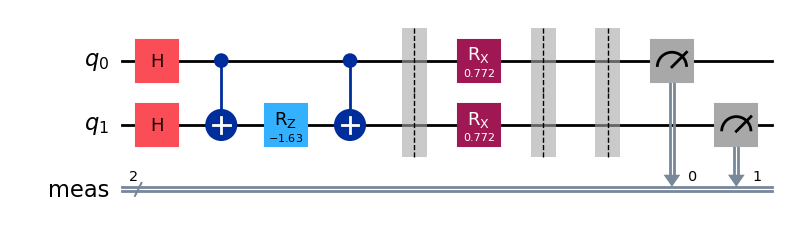

In [16]:
qc = QAOA("+1.0Z0Z1",2)
min = qc.get_min()
print("Minimum energy:", min)
print("Parameters:", qc.param)
plot_histogram(qc.counts)
qc.qc.draw('mpl')

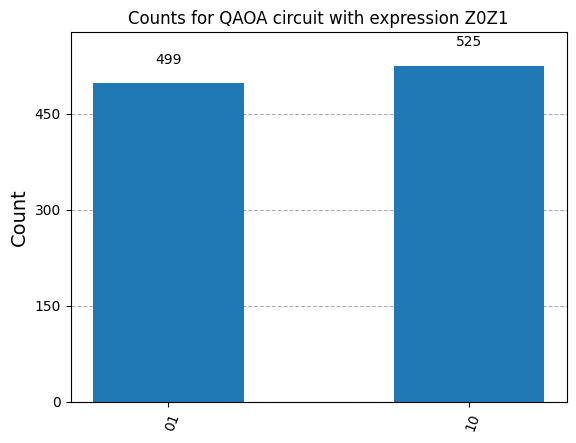

In [9]:
plot_histogram(qc.counts, title="Counts for QAOA circuit with expression Z0Z1")

Let's write this expression as a QUBO and test the function to change from QUBO to Ising. 

Expression: +1.0Z1Z0+2.0Z1
Parameters: [1.3468217  0.35135383]


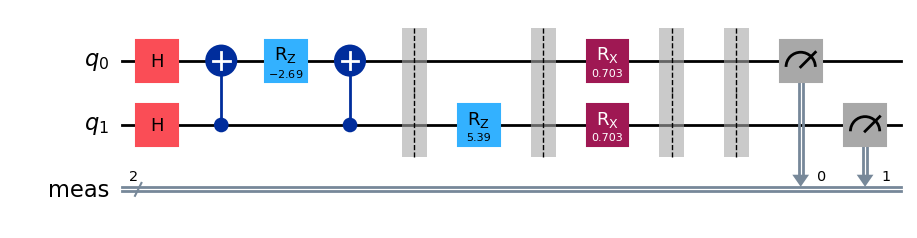

In [61]:
import dimod
from dimod import BinaryQuadraticModel, BINARY

x1 = dimod.Binary("1")
x0 = dimod.Binary("0")
prob = BinaryQuadraticModel({},{},0.0,BINARY)
prob = 4*x0*x1 -2*x0 + 2*x1 + 1
h, J, _ = prob.to_ising()
# print(f'Linar coeffs: {h}')
# print(f'Quadratic terms: {J}')
exp = ""

for term in J:
    exp+="+"+str(J[term])+"Z"+str(term[0])+"Z"+str(term[1])

for term in h:
    if h[term]>0:
        exp+="+"+str(h[term])+"Z"+str(term)
    elif h[term]<0:
        exp+=str(h[term])+"Z"+str(term)
print("Expression:", exp)
qc = QAOA(exp,2,layers=1)
qc.get_min()
print("Parameters:", qc.param)
qc.qc.draw('mpl')

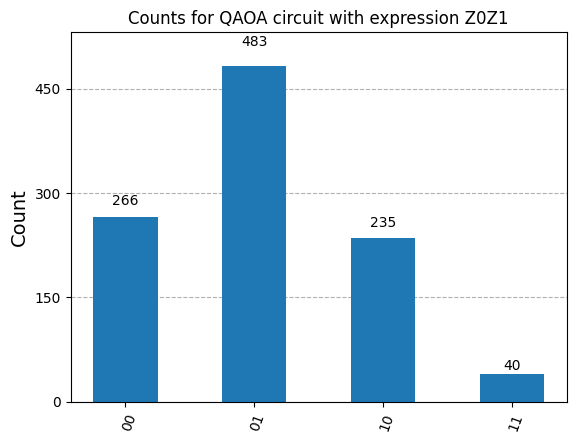

In [62]:
plot_histogram(qc.counts, title="Counts for QAOA circuit with expression Z0Z1")

It seems to work just fine, let's try a more complex example, like a max_cut.

Minimum energy: -0.384765625
Parameters: [0.36171294 0.36036294]


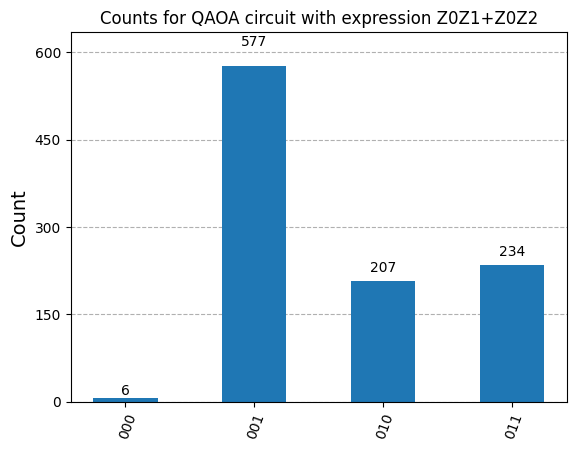

In [74]:
expr = "Z0Z1+Z0Z2"
min = 1000000
best = {}
param = []
for i in range(50):
    qc = QAOA(expr,3,layers=1)
    qc.get_min()
    counts = combine_inverse_keys(qc.counts)
    if qc.min<min:
        min = qc.min
        best = counts
        param = qc.param
print("Minimum energy:", min)
print("Parameters:", param)
plot_histogram(best, title="Counts for QAOA circuit with expression Z0Z1+Z0Z2")

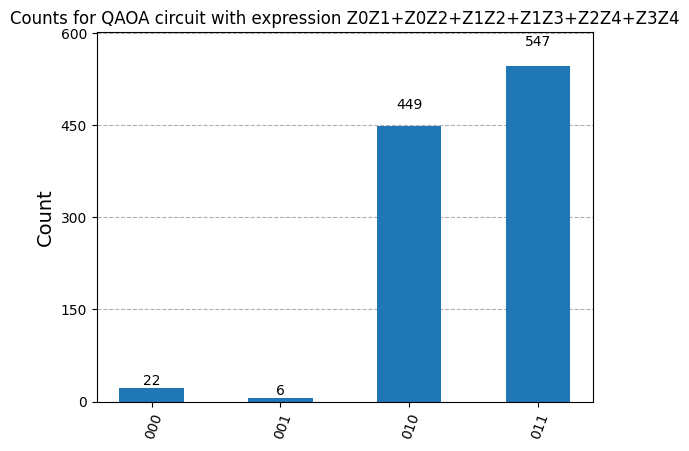

In [69]:
plot_histogram(counts, title="Counts for QAOA circuit with expression Z0Z1+Z0Z2+Z1Z2+Z1Z3+Z2Z4+Z3Z4")

In [7]:
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

# Define the Hamiltonian: H = Z0Z1 + Z0Z2
# hamiltonian = SparsePauliOp.from_list([
#     ("ZZIII", 1.0),  # Z0 Z1
#     ("ZIZII", 1.0),  # Z0 Z2
#     ("IZZII", 1.0),  # Z1 Z2
#     ("IZIZI", 1.0),  # Z1 Z3
#     ("IIZIZ", 1.0),  # Z2 Z4
#     ("IIIZZ", 1.0),  # Z3 Z4
# ])

hamiltonian = SparsePauliOp.from_list([
    ("ZI", 1.0),  # Z0 Z1
    ("IZ", -2.0)
])

# Create the QAOA instance
sampler = BackendSampler(backend=AerSimulator())
qaoa = QAOA(sampler=sampler, optimizer=COBYLA(maxiter=100), reps=1)

# Compute the minimum eigenvalue (i.e., approximate ground state)
result = qaoa.compute_minimum_eigenvalue(hamiltonian)

# Extract the measurement distribution
best_result = result.best_measurement['bitstring']
print("Best result:", best_result)

# Convert bitstring to array of bits
# bit_array = [int(b) for b in most_likely_bitstring]

# Print the result
print("Estimated ground state energy:", result.eigenvalue.real)

Best result: 10
Estimated ground state energy: -2.70703125


C:\Users\nicolas.fernandez\AppData\Local\Temp\ipykernel_10280\3012470587.py:23: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend=AerSimulator())


Ok, so I think my program has something wrong, let's try to use this QAOA with the PhyloTree function, to do this, first we need a function that generates the SparsePauli list from the expression

In [2]:
import dimod
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
print(exp)

+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+7500.0Z1+7500.0Z0+7500.0Z2+7500.0Z3+7500.0Z4


In [21]:
def to_pauli_string(expr: str,size: int) -> SparsePauliOp:
    """Convert a string expression to a SparsePauliOp.
    
    Args:
        expr (str): The expression in the form of '+coeff*Z0Z1+coeff*Z1Z2+...'.
        size (int): The number of qubits in the system.
    
    Returns:
        SparsePauliOp: The corresponding SparsePauliOp representation.
    """
    # Handle the negative coefficients and ensure the expression is well-formed
    expr = re.sub(r'(?<=[0-9])(-)(?=[0-9])','+-',expr)
    if expr[0] == '+':
        expr = expr[1:]
    # Handle exponential like E+10 and E-10
    expr = re.sub(r'([+-]?\d*\.?\d+)([Ee][+-]?\d+)', r'\1\2', expr)
    expr = expr.replace(' ', '')  # Remove any spaces for easier parsing
    terms = re.split(r'(?<=[0-9])(?:\+)(?=[0-9]|-|Z)', expr)
    pauli_terms = []
    for term in terms:
        coeffs = term.split('Z')
        coeffs[0] = float(coeffs[0]) if coeffs[0] else 1.0
        pauli_string = 'I' * size  # Assuming size qubits
        if coeffs[1:]:
            for qubit in coeffs[1:]:
                index = int(qubit)
                pauli_string = pauli_string[:index] + 'Z' + pauli_string[index + 1:]
        pauli_terms.append((pauli_string, coeffs[0]))
    return SparsePauliOp.from_list(pauli_terms)

In [48]:
expr = "+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+2500.0Z1+2500.0Z0+2500.0Z2+2500.0Z3+2500.0Z4"
hamiltonian = to_pauli_string(expr, 5)

# Compute the minimum eigenvalue (i.e., approximate ground state)
result = qaoa.compute_minimum_eigenvalue(hamiltonian)

# Extract the measurement distribution
best_result = result.best_measurement['bitstring']
print("Best result:", best_result)

# Convert bitstring to array of bits
# bit_array = [int(b) for b in most_likely_bitstring]

# Print the result
print("Estimated ground state energy:", result.eigenvalue.real)

Best result: 11010
Estimated ground state energy: -2857.1484375


Let's try the new function:

In [ ]:
def qaoa_phylo_tree_qiskit(matrix:np.ndarray,tags=[],**kwargs):
    r"""
    Recursive function that uses QAOA to create the Phylogenetic tree using Ncut
    
    Args:
        `matrix`: The matrix defining the graph.
        `tags`: Tags defining the names of the nodes, used for recursivity. **MUST BE AN INT LIST**
    Returns:
        The `TreeNode` containing the full tree. 
    """
    ncuts = []
    
    if not tags:
        sub_mat = matrix
        tags = list(range(matrix.shape[0]))
    else:
        sub_mat = matrix[np.ix_(tags, tags)]
        
    rows = sub_mat.shape[0]
    
    var = int(np.floor(rows/2.0))+1
    
    sampler = BackendSampler(backend=AerSimulator())
    result = '0'*rows
    # Repeat until a cut is found
    while not ncuts:
        
        n_graph_0 = []
        n_graph_1 = []
        # Run min_cut for each configuration
        for i in range(1,var):
            # print(f'Corte con {i}')
            if 'timer' in kwargs:
                start = time.time_ns()/1000000
                # Prepare the expression and run the QAOA    
            problem = prepare_exp(sub_mat,c=i)
            pstring = to_pauli_string(problem,rows)
            while result == '0'*rows or result == '1'*rows:
                qaoa = QAOA(sampler=sampler, optimizer=COBYLA(maxiter=500), reps=1)

                # Compute the minimum eigenvalue (i.e., approximate ground state)
                rest = qaoa.compute_minimum_eigenvalue(pstring)

                # Extract the measurement distribution
                result = rest.best_measurement['bitstring']
                minim = rest.eigenvalue.real
                    
            # Time measurement
            if 'timer' in kwargs:
                end = time.time_ns()/1000000
                kwargs['timer'].update(end-start)
                
            n_graph_0.append([tags[j] for j in range(len(result)) if result[j]=='0'])
            n_graph_1.append([tags[j] for j in range(len(result)) if result[j]=='1'])        
            # print(f'\tLa division es: {n_graph_0[i-1]} | {n_graph_1[i-1]}')
            
            if n_graph_0[i-1] and n_graph_1[i-1]:
                ncuts.append(n_cut(minim,n_graph_0[i-1],n_graph_1[i-1],matrix))
                
        
    
    # Get the cuts created by the minimum ncut value
    index = np.argmin(ncuts)
    # print(f'Se selecciona la separacion: {n_graph_0[index]} | {n_graph_1[index]}')
    
    node = TreeNode(tags)
    
    # Recursivity in the first graph
    if len(n_graph_0[index]) > 2:
        if 'timer' in kwargs:
            node.children.append(qaoa_phylo_tree_qiskit(matrix,tags=n_graph_0[index],timer=kwargs['timer']))
        else:
            node.children.append(qaoa_phylo_tree_qiskit(matrix,tags=n_graph_0[index]))
    else:
        leaf = TreeNode(n_graph_0[index])
        if len(n_graph_0[index]) == 2:
            leaf.children.append(TreeNode([n_graph_0[index][0]]))
            leaf.children.append(TreeNode([n_graph_0[index][1]]))
        node.children.append(leaf)
        
    # Recursivity in the first graph
    if len(n_graph_1[index]) > 2:
        if 'timer' in kwargs:
            node.children.append(qaoa_phylo_tree_qiskit(matrix,tags=n_graph_1[index],timer=kwargs['timer']))
        else:
            node.children.append(qaoa_phylo_tree_qiskit(matrix,tags=n_graph_1[index]))
    else:
        leaf = TreeNode(n_graph_1[index])
        if len(n_graph_1[index]) == 2:
            leaf.children.append(TreeNode([n_graph_1[index][0]]))
            leaf.children.append(TreeNode([n_graph_1[index][1]]))
        node.children.append(leaf)
    
    return node

El tiempo utilizado es: 545.41357421875


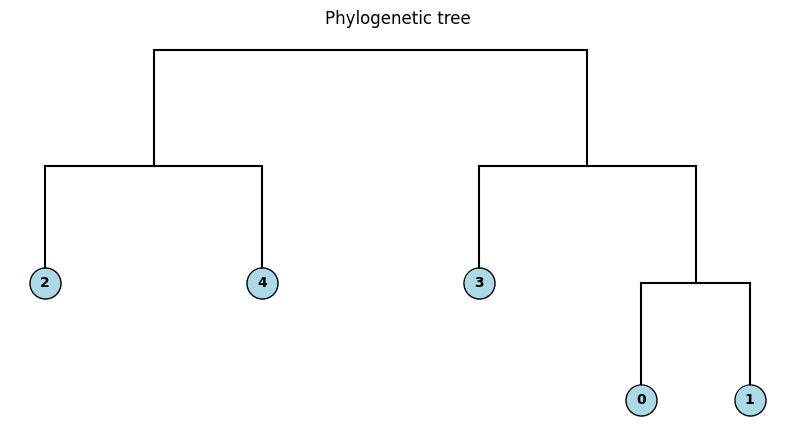

In [4]:
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
timer = Timer(0.0)
tree = qaoa_phylo_tree_qiskit (matrix,timer = timer)
print(f'El tiempo utilizado es: {timer}')
tree.display_tree()

In [5]:
# Test with size 8 matrix
matrix = np.load(f'../matrices/8/matrix_1822.npy')
timer = Timer(0.0)
tree = qaoa_phylo_tree_qiskit(matrix,timer = timer)
print(f'El tiempo utilizado es: {timer}')
tree.create_newick_file('phylo_tree_8.txt')

El tiempo utilizado es: 2911.72509765625


In [6]:
from qa_functions import treecmp
# Compare with exact solution
with open(f'../trees/8/tree_best_1822.newick','r') as fp:
    biotree = fp.read()

with open(f'phylo_tree_8.txt','r') as fp:
    qaoa_tree = fp.read()

biotree = re.sub(r'taxon([0-9]+)',lambda match: str(int(match.group(1)) - 1),biotree)
biotree = re.sub(r':[0-9]\.[0-9]+(e-[0-9]+)*',r'',biotree)
# print(biotree)
dist = treecmp(qaoa_tree,biotree)
print(f'Distancia entre los arboles: {dist}')

Distancia entre los arboles: 60.0


# Testing with all matrices

In [7]:
import os
file_names = os.listdir('../matrices')

for folder in file_names:
    files = os.listdir(f'../matrices/{folder}')
    if int(folder) < 10:
        for file in files:
            # Load the sequences
            distance_matrix = np.load(f'../matrices/{folder}/{file}')

            print(f'Generating tree from: {file}')
            # Create the tree
            timer = Timer(0.0)
            tree_qaoa = qaoa_phylo_tree_qiskit(distance_matrix,timer=timer)

            with open('../metrics/timer_qaoa_qiskit.csv','a') as fp:
                fp.write(f'{folder},{file},{timer.value}\n')

            file_ext = re.search(r'_([0-9]+)\.',file).group(1)
            new_file = f'qiskit_tree_{file_ext}.newick'
            tree_qaoa.create_newick_file(f'../trees/{folder}/{new_file}')
            print(f'Finished {file} in {timer.value}ms')

            del distance_matrix

Generating tree from: matrix_1822.npy
Finished matrix_1822.npy in 1867.22314453125ms
Generating tree from: matrix_32709.npy
Finished matrix_32709.npy in 3135.470947265625ms


In [14]:
from collections import defaultdict
import os

file_names = os.listdir('../trees')

with open('../metrics/RF-distance_qiskit.csv','w+') as fp:
    fp.write('size,id,RF\n')

# Remove the folder test
file_names = file_names[:-2]

for folder in file_names:
    files = os.listdir(f'../trees/{folder}')
    if int(folder) > 7 and int(folder) < 30:
        trees = defaultdict(list)
        for file in files:
            name, ext = os.path.splitext(file)
            fields = name.split('_')
            # print(fields)
            if fields[0] == 'qiskit' or fields[0]=='tree':
                trees[fields[-1]].append(file)
        # print(trees)
        for key in trees.keys():
            print(f'Comparation between {trees[key][0]} and {trees[key][1]} is done')
            with open(f'../trees/{folder}/{trees[key][0]}','r') as fp:
                qa_tree = fp.read()

            with open(f'../trees/{folder}/{trees[key][1]}','r') as fp:
                biotree = fp.read()

            biotree = re.sub(r'taxon([0-9]+)',lambda match: str(int(match.group(1)) - 1),biotree)
            biotree = re.sub(r':[0-9]\.[0-9]+(e-[0-9]+)*',r'',biotree)
            # print(biotree)
            dist = treecmp(qa_tree,biotree)
            
            with open('../metrics/RF-distance_qiskit.csv','a') as fp:
                fp.write(f'{folder},{key},{dist}\n')

            # print(f'The Robinson-Foulds distance bewteen the Ncut with QA tree and the Neighbor-Joining tree is \033[1m{dist}\033[22m')

Comparation between qiskit_tree_28864.newick and tree_best_28864.newick is done
Comparation between qiskit_tree_11523.newick and tree_best_11523.newick is done
Comparation between qiskit_tree_7791.newick and tree_best_7791.newick is done
Comparation between qiskit_tree_13951.newick and tree_best_13951.newick is done
Comparation between qiskit_tree_10953.newick and tree_best_10953.newick is done
Comparation between qiskit_tree_11018.newick and tree_best_11018.newick is done
Comparation between qiskit_tree_10618.newick and tree_best_10618.newick is done
Comparation between qiskit_tree_41388.newick and tree_best_41388.newick is done
Comparation between qiskit_tree_45255.newick and tree_best_45255.newick is done
Comparation between qiskit_tree_48947.newick and tree_best_48947.newick is done
Comparation between qiskit_tree_1.newick and tree_best_10240_1.newick is done
Comparation between qiskit_tree_10240.newick and tree_best_10240.newick is done
Comparation between qiskit_tree_29684.newick

# IBM test runtime

We will try to run the QAOA in a real QPU using the IBM runtime package.

In [2]:
# !pip install qiskit-ibm-runtime

In [24]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import Sampler

backend = FakeManilaV2()

expr = "+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+2500.0Z1+2500.0Z0+2500.0Z2+2500.0Z3+2500.0Z4"
hamiltonian = to_pauli_string(expr, 5)

qaoa = QAOAAnsatz(cost_operator=hamiltonian, reps=1)

tc = transpile(qaoa, backend=backend)

sampler = Sampler(backend)
job = sampler.run([tc])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

ValueError: The number of values (0) does not match the number of parameters (2) for the circuit. Note that if you want to run a single pub, you need to wrap it with `[]` like `sampler.run([(circuit, param_values)])` instead of `sampler.run((circuit, param_values))`.

In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
 
# get a real backend from the runtime service
backend = FakeManilaV2()
 
# generate a simulator that mimics the real quantum
# system with the latest calibration results
backend_sim = AerSimulator.from_backend(backend)

In [37]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2
 
# get a real backend from the runtime service
backend = FakeManilaV2()
 
# generate a simulator that mimics the real quantum
# system with the latest calibration results
sampler = BackendSampler(backend=FakeManilaV2())

expr = "+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+2500.0Z1+2500.0Z0+2500.0Z2+2500.0Z3+2500.0Z4"
hamiltonian = to_pauli_string(expr, 5)

qaoa = QAOA(sampler=sampler, optimizer=COBYLA(maxiter=500), reps=1)

# Compute the minimum eigenvalue (i.e., approximate ground state)
rest = qaoa.compute_minimum_eigenvalue(hamiltonian)

# Extract the measurement distribution
result = rest.best_measurement['bitstring']
minim = rest.eigenvalue.real
print(f'Result: {result}, Minimum energy: {minim}')

C:\Users\nicolas.fernandez\AppData\Local\Temp\ipykernel_928\216988446.py:10: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend=FakeManilaV2())


Result: 11010, Minimum energy: 90.197265625


El tiempo utilizado es: 482.130859375


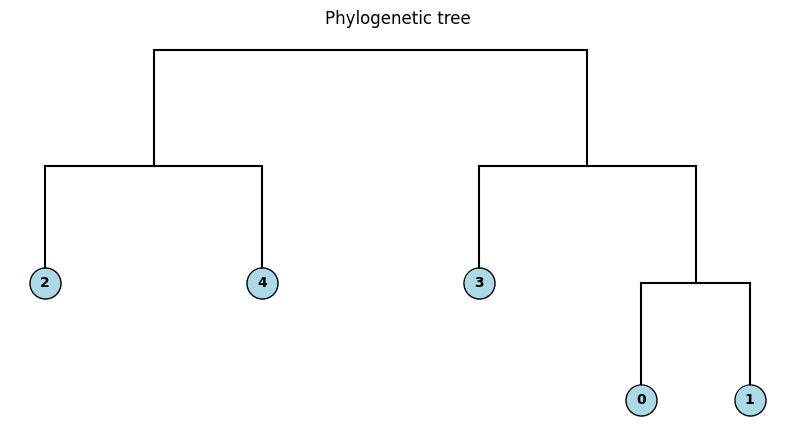

In [38]:
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
timer = Timer(0.0)
tree = qaoa_phylo_tree_qiskit (matrix,timer = timer,backend=FakeManilaV2())
print(f'El tiempo utilizado es: {timer}')
tree.display_tree()

In [21]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeBrisbane,FakeFez,FakeTorino

backend = AerSimulator.from_backend(FakeTorino())

backend.configuration().n_qubits

133

In [26]:
import os
from qiskit_ibm_runtime.fake_provider import FakeAlgiers,FakeGuadalupeV2
file_names = os.listdir('../matrices')
backend_name = 'algiers'  # Change this to 'fez' or 'torino' as needed
with open(f'../metrics/timer_qaoa_qiskit_{backend_name}.csv','w') as fp:
    fp.write(f'size,id,time\n')
for folder in file_names:
    files = os.listdir(f'../matrices/{folder}')
    if int(folder) < 16 and int(folder) > 7:
        for file in files:
            # Load the sequences
            distance_matrix = np.load(f'../matrices/{folder}/{file}')

            print(f'Generating tree from: {file}')
            # Create the tree
            timer = Timer(0.0)
            tree_qaoa = qaoa_phylo_tree_qiskit(distance_matrix,timer=timer,backend=FakeAlgiers())

            with open(f'../metrics/timer_qaoa_qiskit_{backend_name}.csv','a') as fp:
                fp.write(f'{folder},{file},{timer.value}\n')

            file_ext = re.search(r'_([0-9]+)\.',file).group(1)
            new_file = f'qiskit_tree_{backend_name}_{file_ext}.newick'
            tree_qaoa.create_newick_file(f'../trees/{folder}/{new_file}')
            print(f'Finished {file} in {timer.value}ms')

            del distance_matrix

Generating tree from: matrix_28864.npy
Finished matrix_28864.npy in 208733.12670898438ms
Generating tree from: matrix_11523.npy
Finished matrix_11523.npy in 391872.3798828125ms
Generating tree from: matrix_7791.npy
Finished matrix_7791.npy in 932224.8332519531ms
Generating tree from: matrix_13951.npy
Finished matrix_13951.npy in 3108999.022705078ms
Generating tree from: matrix_10953.npy
Finished matrix_10953.npy in 6061614.567138672ms
Generating tree from: matrix_11018.npy
Finished matrix_11018.npy in 16347523.14038086ms
Generating tree from: matrix_1822.npy
Finished matrix_1822.npy in 72917.41723632812ms
Generating tree from: matrix_32709.npy
Finished matrix_32709.npy in 78034.96020507812ms


In [29]:
from collections import defaultdict
import os

file_names = os.listdir('../trees')
backend_name = 'algiers'
with open(f'../metrics/RF-distance_qiskit_{backend_name}.csv','w+') as fp:
    fp.write('size,id,RF\n')

# Remove the folder test
file_names = file_names[:-2]

for folder in file_names:
    files = os.listdir(f'../trees/{folder}')
    if int(folder) > 7 and int(folder) < 16:
        trees = defaultdict(list)
        for file in files:
            name, ext = os.path.splitext(file)
            fields = name.split('_')
            # print(fields)
            if (fields[0] == 'qiskit' and fields[2]== f'{backend_name}') or fields[0]=='tree':
                trees[fields[-1]].append(file)
        # print(trees)
        for key in trees.keys():
            print(f'Comparation between {trees[key][0]} and {trees[key][1]} is done')
            with open(f'../trees/{folder}/{trees[key][0]}','r') as fp:
                qa_tree = fp.read()

            with open(f'../trees/{folder}/{trees[key][1]}','r') as fp:
                biotree = fp.read()

            biotree = re.sub(r'taxon([0-9]+)',lambda match: str(int(match.group(1)) - 1),biotree)
            biotree = re.sub(r':[0-9]\.[0-9]+(e-[0-9]+)*',r'',biotree)
            # print(biotree)
            dist = treecmp(qa_tree,biotree)
            
            with open(f'../metrics/RF-distance_qiskit_{backend_name}.csv','a') as fp:
                fp.write(f'{folder},{key},{dist}\n')

            # print(f'The Robinson-Foulds distance bewteen the Ncut with QA tree and the Neighbor-Joining tree is \033[1m{dist}\033[22m')

Comparation between qiskit_tree_algiers_28864.newick and tree_best_28864.newick is done
Comparation between qiskit_tree_algiers_11523.newick and tree_best_11523.newick is done
Comparation between qiskit_tree_algiers_7791.newick and tree_best_7791.newick is done
Comparation between qiskit_tree_algiers_13951.newick and tree_best_13951.newick is done
Comparation between qiskit_tree_algiers_10953.newick and tree_best_10953.newick is done
Comparation between qiskit_tree_algiers_11018.newick and tree_best_11018.newick is done
Comparation between qiskit_tree_algiers_1822.newick and tree_best_1822.newick is done
Comparation between qiskit_tree_algiers_32709.newick and tree_best_32709.newick is done


## Inclusion with my QAOA

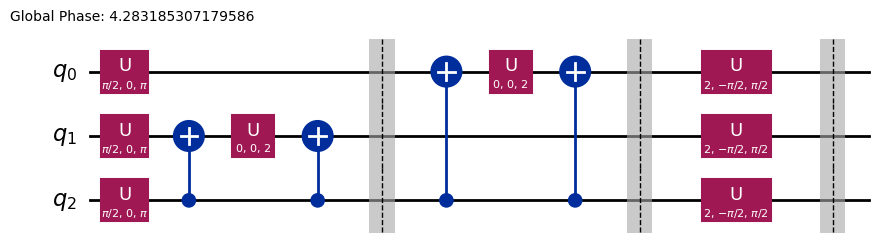

In [3]:
from qiskit.circuit.library import QAOAAnsatz


expr = "Z0Z1+Z0Z2"

mqaoa = create_ansatz(expr,3,layers=1,phi=[1],beta=[1])
mst = Statevector(mqaoa)
mqaoa.decompose(reps=43).draw('mpl')



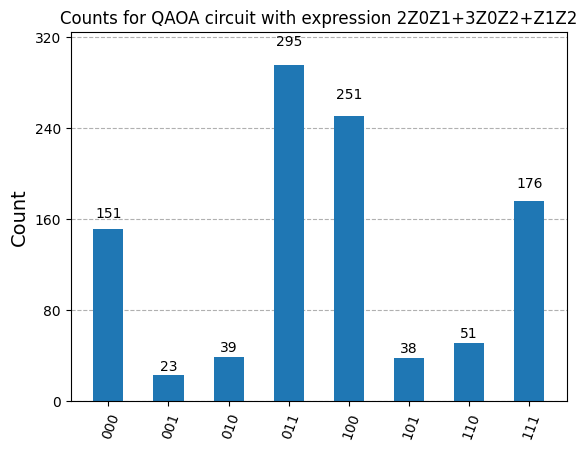

In [4]:
sim = AerSimulator()
sampler = SamplerV2()
mqaoa.measure_all()
qaoa = transpile(mqaoa, backend=sim)
job = sampler.run([(qaoa)])
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
plot_histogram(counts, title="Counts for QAOA circuit with expression 2Z0Z1+3Z0Z2+Z1Z2")

SparsePauliOp(['ZZI', 'ZIZ'],
              coeffs=[1.+0.j, 1.+0.j])


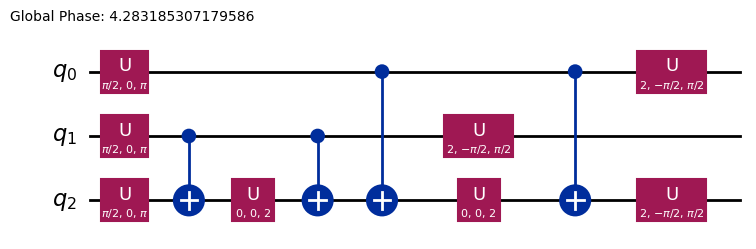

In [5]:
pauliexp = to_pauli_string(expr,3)
print(pauliexp)
qqaoa = QAOAAnsatz(cost_operator=pauliexp, reps=1)
qqaoa_parameters = qqaoa.assign_parameters([1, 1])
qst = Statevector(qqaoa_parameters)
qqaoa_parameters.decompose(reps = 43).draw('mpl')

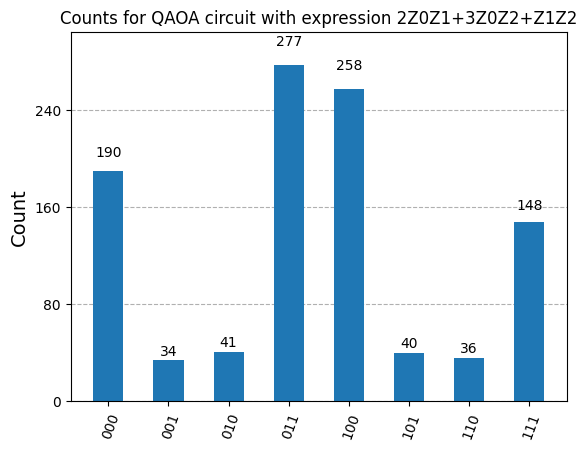

In [5]:
sim = AerSimulator()
sampler = SamplerV2()
qqaoa.measure_all()
qaoa = transpile(qqaoa, backend=sim)
job = sampler.run([(qaoa,[1,1])])
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
plot_histogram(counts, title="Counts for QAOA circuit with expression 2Z0Z1+3Z0Z2+Z1Z2")

In [6]:
print(mst)
print(qst)
print(mst-qst)

Statevector([ 0.03308149-0.39891974j,  0.03308149+0.1960901j ,
              0.03308149+0.1960901j , -0.50795943-0.05152136j,
             -0.50795943-0.05152136j,  0.03308149+0.1960901j ,
              0.03308149+0.1960901j ,  0.03308149-0.39891974j],
            dims=(2, 2, 2))
Statevector([ 0.03308149-0.39891974j,  0.03308149+0.1960901j ,
              0.03308149+0.1960901j , -0.50795943-0.05152136j,
             -0.50795943-0.05152136j,  0.03308149+0.1960901j ,
              0.03308149+0.1960901j ,  0.03308149-0.39891974j],
            dims=(2, 2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


We see that the QAOA ansatz inverses the order of the elements. We will input that in our QAOA.

In [33]:
qc = QuantumCircuit(3)
for i in range(3):
    qc.h(i)

qc.cx(2,1)
qc.rz(2,1)
qc.cx(2,1)

qc.cx(2,0)
qc.rz(2,0)
qc.cx(2,0)

for i in range(3):
    qc.rx(2,i)
qc.draw('mpl')

randomst = Statevector(qc)

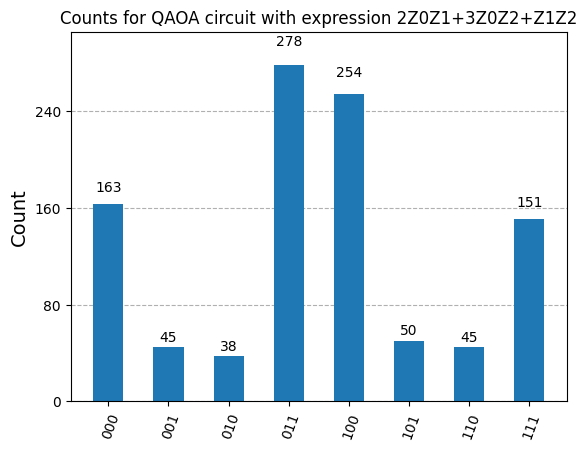

In [32]:
sim = AerSimulator()
sampler = SamplerV2()
qc.measure_all()
qaoa = transpile(qc, backend=sim)
job = sampler.run([(qaoa)])
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
plot_histogram(counts, title="Counts for QAOA circuit with expression 2Z0Z1+3Z0Z2+Z1Z2")

In [34]:
print(randomst-qst)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


We will test the inversion with a normal problem.

Minimum energy: -3759.7314453125
Parameters: [2.27539947 0.72013256]


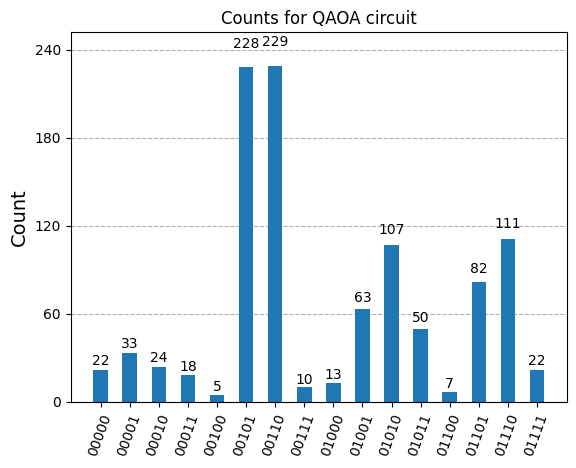

In [7]:
expr = "+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+2500.0Z1+2500.0Z0+2500.0Z2+2500.0Z3+2500.0Z4"
qaoa = MyQAOA(expr,5,layers=1)

qaoa.get_min()

print(f'Minimum energy: {qaoa.min}')
print(f'Parameters: {qaoa.param}')
counts = combine_inverse_keys(qaoa.counts)
plot_histogram(counts, title="Counts for QAOA circuit")

This is looking good? I guess it is, better than before at least.